In [22]:
import csv
import numpy as np
import ROOT as rt
from glob import glob

In [23]:
def frange(start, stop, step):
    i = start
    ll = []
    while i < stop:
        ll.append(i)
        i += step
    return ll
#Saturation Effect 

def undo_saturation(coeff_lin,coeff_poly,y):
    def func(coeff,x):
        y=0
        for i in range(len(coeff)):
            y+=x**i*coeff[i]
        return y
    x_range=frange(0,1,0.0005)
    min_diff=100000
    x_value = 0
    for x in x_range:
        if abs(func(coeff_poly,x)-y)<min_diff:
            min_diff=abs(func(coeff_poly,x)-y)
            x_value = x
    
    return func(coeff_lin,x_value)




def saturation(sipm,pe):
    if sipm == "J_33_35": #fit from 0 to 6000
        lin=[24.4358,10926.6] #p0,p1
        poly = [15.77,11458.4,-7611.87,2021.35]
    elif sipm == "J_44_35":
        lin = [18.9361,17069.1]
        poly = [510.945,18846.8,-14119.7,4660.29]
    elif sipm == "C_33_20":
        lin = [2.46893,3960.19]
        poly = [51.6473,3777.88,-263.544,-185.634]
    return undo_saturation(lin,poly,pe)





In [28]:
mg = rt.TMultiGraph()
ham = rt.TGraphErrors(15)
sensL_J_33_35 = rt.TGraphErrors(22) #j series
sensL_newAmp = rt.TGraphErrors(6)  #j series,33,35
sensL_J_44_35 = rt.TGraphErrors(14)
one_sided = rt.TGraphErrors(3)
sensL_C_33_20 = rt.TGraphErrors(15)
sipm = 3.0*3.0

# These are all number of photoelectrons without crosstalk
#31% for sensl C, 40% for sensl J, 25% for Ham

#tiles
sensL_J_44_35.SetPoint(0,float(4.0*4.0/(7.8*7.8) * 100), saturation("J_44_35",6570))
sensL_J_44_35.SetPoint(1,float(4.0*4.0/(7.8*7.8) * 100), saturation("J_44_35",7079))
sensL_J_44_35.SetPoint(2,float(4.0*4.0/(7.8*7.8) * 100), saturation("J_44_35",6458))
sensL_J_44_35.SetPoint(3,float(4.0*4.0/(7.8*7.8) * 100), saturation("J_44_35",7325))

#two-sided bars
# sensL_J_44_35.SetPoint(4,float(4.0*4.0/(3.0*3.0) * 100), 5367)
sensL_J_44_35.SetPoint(5,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",6523))
sensL_J_44_35.SetPoint(6,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",6450))
sensL_J_44_35.SetPoint(7,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",6928))


#one-sided bar, other side exposed

sensL_J_44_35.SetPoint(8,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",4131))
sensL_J_44_35.SetPoint(9,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",3472))
sensL_J_44_35.SetPoint(10,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",4248))
sensL_J_44_35.SetPoint(11,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",4544))
sensL_J_44_35.SetPoint(12,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",3586))
sensL_J_44_35.SetPoint(13,float(4.0*4.0/(3.0*3.0) * 100), saturation("J_44_35",4228))



sensL_C_33_20.SetPoint(0,float(sipm/(7.8*7.8) * 100), saturation("C_33_20",9604*0.31)) #data from 18_11_02
sensL_C_33_20.SetPoint(1,float(sipm/(7.8*7.8) * 100), saturation("C_33_20",9554*0.31))
sensL_C_33_20.SetPoint(2,float(sipm/(7.8*7.8) * 100), saturation("C_33_20",10257*0.31))
sensL_C_33_20.SetPoint(3,float(sipm/(3*3) * 100), saturation("C_33_20",9918*0.31)) #one-sided, other side exposed bar




#Photo electron numbers
# sensL_newAmp.SetPoint(0, float(sipm/(7.8*7.8) * 100), saturation("J_33_35",4755))#8 x 8, v3
# # sensL_newAmp.SetPoint(1, float(sipm/(7.8*7.8) * 100), 3940)#8 x 8
# sensL_newAmp.SetPoint(2, float(sipm/(7.8*7.8) * 100), saturation("J_33_35",4463))#8 x 8

# #bar, one side exposed
# sensL_newAmp.SetPoint(3, float(sipm/(3*3) * 100), saturation("J_33_35",2921)) #sensL 5, 52+ v3
# sensL_newAmp.SetPoint(4, float(sipm/(3*3) * 100), saturation("J_33_35",3014)) #sensL 5, 52+ v2
# sensL_newAmp.SetPoint(5, float(sipm/(3*3) * 100), saturation("J_33_35",2924))#sensL 5, 52+ v1
# sensL_newAmp.SetPoint(6, float(sipm/(3*3) * 100), saturation("J_33_35",3014))#using sensL 4, 74+ amp


# sensL_J_33_35.SetPoint(0, float(sipm/(3 * 3) * 100), saturation("J_33_35",10328*0.4)) #one-sided bar
sensL_J_33_35.SetPoint(1,float(sipm/(3 * 3) * 100),saturation("J_33_35",12466*0.4)) #two-sided bar
sensL_J_33_35.SetPoint(2,float(sipm/(3 * 3) * 100),saturation("J_33_35",12149*0.4)) #two-sided bar
sensL_J_33_35.SetPoint(3,float(sipm/(3 * 3) * 100),saturation("J_33_35",12089*0.4)) #two-sided bar
sensL_J_33_35.SetPoint(4,float(sipm/(3 * 3) * 100),saturation("J_33_35",12064*0.4))#two-sided bar




#one sided bar, one side exposed
sensL_J_33_35.SetPoint(0, float(sipm/(3 * 3) * 100), saturation("J_33_35",6885*0.4))
sensL_J_33_35.SetPoint(1, float(sipm/(3 * 3) * 100), saturation("J_33_35",6466*0.4))
sensL_J_33_35.SetPoint(2, float(sipm/(3 * 3) * 100), saturation("J_33_35",6610*0.4))

#one sided bar, the other side with SiPM
# sensL_J_33_35.SetPoint(5, float(sipm/(3 * 3) * 100), saturation("J_33_35",5720*0.4))
# sensL_J_33_35.SetPoint(6, float(sipm/(3 * 3) * 100), saturation("J_33_35",6099*0.4))
# sensL_J_33_35.SetPoint(7, float(sipm/(3 * 3) * 100), saturation("J_33_35",6651*0.4))
# sensL_J_33_35.SetPoint(8, float(sipm/(3 * 3) * 100), saturation("J_33_35",6915*0.4))




# sensL_J_33_35.SetPoint(9, float(sipm/(12*12)*100), saturation("J_33_35",8427*0.4)) #mask wrapping
# sensL_J_33_35.SetPoint(10, float(sipm/(12*12)*100), saturation("J_33_35",7228*0.4)) #si_wrapping 101918
# sensL_J_33_35.SetPoint(11, float(sipm/(12*12)*100), saturation("J_33_35",7512*0.4)) #si wrapping v2
# sensL_J_33_35.SetPoint(12, float(sipm/(12*12)*100), saturation("J_33_35",7851*0.4)) #si wrapping v3

# sensL_J_33_35.SetPoint(13, float(sipm/(5.25 * 5.11)*100), saturation("J_33_35",14173*0.4)) #si wrapping, 102018
# sensL_J_33_35.SetPoint(14, float(sipm/(5.25 * 5.11)*100), saturation("J_33_35",13297*0.4)) #si wrapping v2
# sensL_J_33_35.SetPoint(15, float(sipm/(5.25 * 5.11)*100), saturation("J_33_35",12674*0.4)) #si wrapping v3
# sensL_J_33_35.SetPoint(16, float(sipm/(5.25 * 5.11)*100), saturation("J_33_35",11769*0.4)) #si wrapping v4

sensL_J_33_35.SetPoint(17, float(sipm/(7.77 * 7.76)*100), saturation("J_33_35",12366*0.4))
sensL_J_33_35.SetPoint(18, float(sipm/(7.77 * 7.76)*100), saturation("J_33_35",12680*0.4))
sensL_J_33_35.SetPoint(19, float(sipm/(7.77 * 7.76)*100), saturation("J_33_35",12418*0.4))

 




# Hamamatsu surface mount all si wrapping

ham.SetPoint(0, float(sipm/(7.77 * 7.76)*100), 13325*0.25) 
ham.SetPoint(1, float(sipm/(7.77 * 7.76)*100), 18034*0.25) 
ham.SetPoint(2, float(sipm/(7.77 * 7.76)*100), 14952*0.25) 
ham.SetPoint(3, float(sipm/(7.77 * 7.76)*100), 15486*0.25) 
ham.SetPoint(4, float(sipm/(7.77 * 7.76)*100), 14013*0.25) 
ham.SetPoint(5, float(sipm/(7.8 * 7.8)*100), 15072*0.25)  #rough edges



# ham.SetPoint(6, float(sipm/(12*12)*100), 11458*0.25) 
# ham.SetPoint(7, float(sipm/(12*12)*100), 11126*0.25) 
# ham.SetPoint(8, float(sipm/(12*12)*100), 10814*0.25) 


# ham.SetPoint(9, float(sipm/(5.25 * 5.11)*100), 17621*0.25)
# ham.SetPoint(10, float(sipm/(5.25 * 5.11)*100), 18610*0.25)
# ham.SetPoint(11, float(sipm/(5.25 * 5.11)*100), 15585*0.25)
# ham.SetPoint(12, float(sipm/(5.25 * 5.11)*100), 15575*0.25)

ham.SetPoint(13,float(sipm/(3 * 3) * 100),16405*0.25) #one-sided bar
ham.SetPoint(14,float(sipm/(3 * 3) * 100),13964*0.25) #one-sided bar v2

mg.Add(ham)
mg.Add(sensL_C_33_20)
mg.Add(sensL_J_33_35)
mg.Add(sensL_J_44_35)
# mg.Add(one_sided)
# mg.Add(sensL_newAmp)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_gain
Error in <TF1::TF1>: function: fa1/y/1.019 has dimension 2 instead of 1
Error in <TF1::TF1>: function: fa2/y/1.29 has dimension 2 instead of 1
Error in <TF1::TF1>: function: fa4/y/1.049 has dimension 2 instead of 1
Error in <TF1::TF1>: function: fa2/y/1.29 has dimension 2 instead of 1


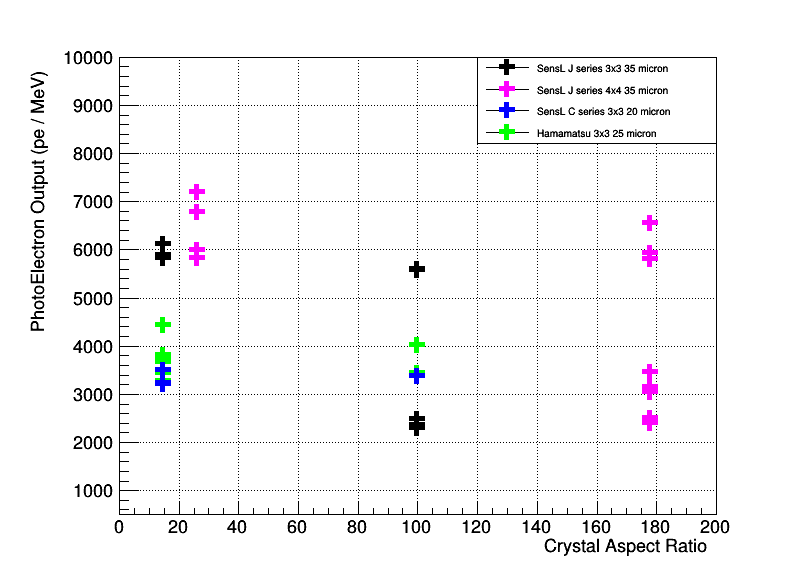

In [29]:
canvas = rt.TCanvas('c_gain', 'c_gain', 800, 600)
mg.SetTitle("")
mg.GetXaxis().SetTitle('Crystal Aspect Ratio')
mg.GetYaxis().SetTitle('PhotoElectron Output (pe / MeV)')
plot_pe = True #else plot photons

# ham.Apply(rt.TF1("fa1","y*21365/24808.7",0,100000))# 21365 was the initial gain, how the light outputs are calculated, and 24808 is the new gain

#apply crosstalk correction
ham.Apply(rt.TF1("fa1","y/1.019",0,100000))
sensL_J_33_35.Apply(rt.TF1("fa2","y/1.29",0,100000))#crosstalk correction
# one_sided.Apply(rt.TF1("fa3","y/1.29",0,100000))
sensL_C_33_20.Apply(rt.TF1("fa4","y/1.049",0,100000))
sensL_J_44_35.Apply(rt.TF1("fa2","y/1.29",0,100000))#crosstalk correction


#Convert photoelectron to photon
if not plot_pe:
    ham.Apply(rt.TF1("fa1","y/0.25",0,100000))
    one_sided.Apply(rt.TF1("fa3","y/0.5",0,100000))
    sensL_C_33_20.Apply(rt.TF1("fa4","y/0.31",0,100000))
    mg.GetYaxis().SetRangeUser(1000,20000)
    mg.GetYaxis().SetTitle('Photo Output (ph / MeV)')






# sensL_newAmp.Apply(rt.TF1("fa1","y/1.29",0,100000))#crosstalk correction

sensL_C_33_20.SetMarkerStyle(34)
sensL_C_33_20.SetMarkerSize(2)
sensL_C_33_20.SetMarkerColor(4)

ham.SetMarkerStyle(34)
ham.SetMarkerSize(2)
ham.SetMarkerColor(3)

one_sided.SetMarkerStyle(34)
one_sided.SetMarkerSize(2)
one_sided.SetMarkerColor(2)


sensL_J_33_35.SetMarkerStyle(34)
sensL_J_33_35.SetMarkerSize(2)
sensL_J_33_35.SetMarkerColor(1)

# sensL_newAmp.SetMarkerStyle(34)
# sensL_newAmp.SetMarkerSize(2)
# sensL_newAmp.SetMarkerColor(5)

sensL_J_44_35.SetMarkerStyle(34)
sensL_J_44_35.SetMarkerSize(2)
sensL_J_44_35.SetMarkerColor(6)

mg.GetYaxis().SetRangeUser(500,10000)


# tiles.Draw("APL")
# bars.Draw("PL*E1")
# tiles.Draw("SAME")
mg.Draw("AP")
rt.gStyle.SetOptFit(000002200)
mg.GetXaxis().SetLimits(0,200)
canvas.SetLeftMargin(0.15)
canvas.SetGrid()
canvas.Draw()
legend = rt.TLegend(0.6,0.75,0.90,0.9);
# legend.AddEntry(sensL_newAmp, "new amp")
legend.AddEntry(sensL_J_33_35,"SensL J series 3x3 35 micron")
legend.AddEntry(sensL_J_44_35,"SensL J series 4x4 35 micron")
legend.AddEntry(sensL_C_33_20,"SensL C series 3x3 20 micron")
# legend.AddEntry(one_sided,"SensL J, one_sided bar, other side exposed")
legend.AddEntry(ham,"Hamamatsu 3x3 25 micron")

legend.Draw()
